In [1]:
### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [7]:
img=image.load_img(r'C:\Users\User\A VS CODE\CNN\testing\2024_10_31_09_58_IMG_9153.JPG')

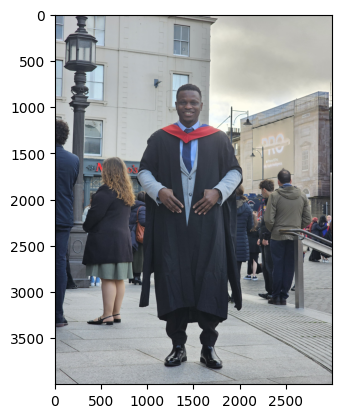

In [8]:
plt.imshow(img)

In [9]:
i1= cv2.imread(r'C:\Users\User\A VS CODE\CNN\testing\2024_10_31_09_58_IMG_9153.JPG')
i1

array([[[168, 144, 124],
        [168, 144, 124],
        [168, 144, 124],
        ...,
        [186, 192, 191],
        [178, 184, 183],
        [170, 176, 175]],

       [[168, 144, 124],
        [168, 144, 124],
        [168, 144, 124],
        ...,
        [187, 193, 192],
        [180, 186, 185],
        [173, 179, 178]],

       [[168, 144, 124],
        [168, 144, 124],
        [168, 144, 124],
        ...,
        [186, 191, 192],
        [182, 187, 188],
        [177, 182, 183]],

       ...,

       [[165, 160, 159],
        [165, 160, 159],
        [165, 160, 159],
        ...,
        [179, 179, 173],
        [171, 171, 165],
        [165, 165, 159]],

       [[169, 164, 163],
        [168, 163, 162],
        [168, 163, 162],
        ...,
        [182, 182, 176],
        [180, 180, 174],
        [178, 178, 172]],

       [[169, 164, 163],
        [167, 162, 161],
        [167, 162, 161],
        ...,
        [170, 170, 164],
        [171, 171, 165],
        [171, 171, 165]]

In [10]:
i1.shape  

(4000, 3000, 3)

In [11]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [13]:
train_dataset=train.flow_from_directory(r'C:\Users\User\A VS CODE\CNN\training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'C:\Users\User\A VS CODE\CNN\validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 33 images belonging to 2 classes.


Found 0 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=5,
                   validation_data=validation_dataset) 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - acc: 0.3704 - loss: 4.6058

ValueError: The PyDataset has length 0

In [ ]:
history.history??

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 2.7805 - acc: 0.5556 - val_loss: 0.8273 - val_acc: 0.4231
Epoch 2/10
3/3 [==============================] - 3s 979ms/step - loss: 0.3682 - acc: 0.7778 - val_loss: 0.9256 - val_acc: 0.4615
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.6017 - acc: 0.7778 - val_loss: 1.0744 - val_acc: 0.3846
Epoch 4/10
3/3 [==============================] - 3s 959ms/step - loss: 0.1696 - acc: 0.8889 - val_loss: 0.9432 - val_acc: 0.4231
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.3171 - acc: 0.7778 - val_loss: 1.1868 - val_acc: 0.4615
Epoch 6/10
3/3 [==============================] - 3s 978ms/step - loss: 0.1584 - acc: 1.0000 - val_loss: 1.1449 - val_acc: 0.3846
Epoch 7/10
3/3 [==============================] - 3s 986ms/step - loss: 0.7063 - acc: 0.7778 - val_loss: 1.5538 - val_acc: 0.3462
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 0.1939 - acc: 0.8889 - val_los

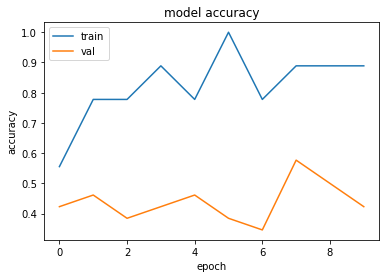

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
history=model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset) 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

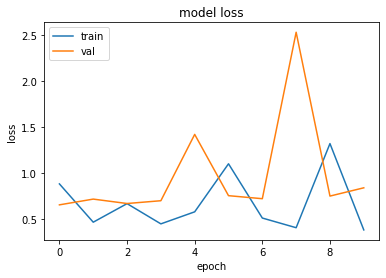

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()